In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./Datasets/MovieLense/movielens-100k-dataset/ml-100k/u.data',
                names = ['user_id', 'movie_id', 'rating', 'timestamp'], sep = '\t')

In [3]:
df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movie_titles1 = pd.read_csv('./Datasets/MovieLens1/ml-1m/movies.dat', sep = '::',
                           names = ['movie_id', 'title', 'genres'])

/home/umairshah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [5]:
movie_titles1.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movie_titles1.drop('genres', axis = 1, inplace = True)
movie_titles1.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [7]:
df = pd.merge(df, movie_titles1, on = 'movie_id')

In [8]:
df.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Farinelli: il castrato (1994)
1,63,242,3,875747190,Farinelli: il castrato (1994)
2,226,242,5,883888671,Farinelli: il castrato (1994)
3,154,242,3,879138235,Farinelli: il castrato (1994)
4,306,242,5,876503793,Farinelli: il castrato (1994)


In [9]:
df.iloc[223]

user_id                                        105
movie_id                                       302
rating                                           5
timestamp                                889214193
title        Queen Margot (La Reine Margot) (1994)
Name: 223, dtype: object

In [10]:
df.describe()

,user_id,movie_id,rating,timestamp
count,98891.000000,98891.000000,98891.000000,9.889100e+04
mean,462.431890,422.756611,3.533527,8.835232e+08
std,266.662362,328.336188,1.124901,5.345106e+06
min,1.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,174.000000,3.000000,8.794482e+08
50%,447.000000,319.000000,4.000000,8.828263e+08
75%,682.000000,628.000000,4.000000,8.882107e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [41]:
# creating a dataframe with average rating of each movie
# and also the number of ratings for that movie

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [42]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.548387
1-900 (1994),3.384615
101 Dalmatians (1996),4.200000
12 Angry Men (1957),4.047619
187 (1997),1.666667


In [43]:
# lets now create a number of ratings columns
# this is to see that how many users have rating for the particular movie
# before we judge the average rating of that movie, since the more users suggest 
# the better rating of a movie, ther more it's chances of being actually better

ratings['number_of_ratings'] = df.groupby('title')['rating'].count()

In [46]:
ratings.head(10)

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.548387,31
1-900 (1994),3.384615,13
101 Dalmatians (1996),4.200000,5
12 Angry Men (1957),4.047619,21
187 (1997),1.666667,3
2 Days in the Valley (1996),2.800000,10
"20,000 Leagues Under the Sea (1954)",3.967742,31
2001: A Space Odyssey (1968),3.400000,85
"301, 302 (1995)",3.888889,90


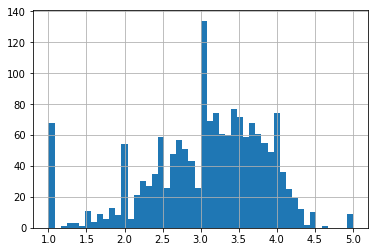

In [49]:
# Let's now see the visualization of distribution of ratings

ratings['rating'].hist(bins = 50)

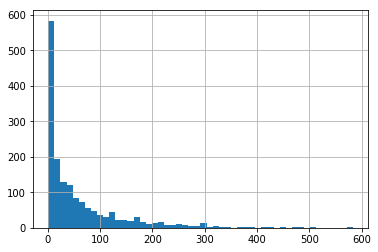

In [52]:
ratings['number_of_ratings'].hist(bins = 50)

/home/umairshah/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


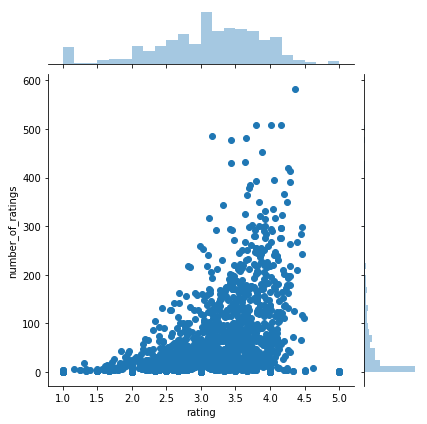

In [54]:
# Visualizing the relatin between average ratings and no. of ratings

sns.jointplot(x = 'rating', y = 'number_of_ratings', data = ratings)

In [61]:
df.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Farinelli: il castrato (1994)
1,63,242,3,875747190,Farinelli: il castrato (1994)
2,226,242,5,883888671,Farinelli: il castrato (1994)
3,154,242,3,879138235,Farinelli: il castrato (1994)
4,306,242,5,876503793,Farinelli: il castrato (1994)


In [57]:
# Let's now create a movie_matrix that has columns as 'movie_title'
# rows as 'user_ids' and the values as ratings of each user to each movie
# Later on, we'll find the correlations of each movie with the other movies 

movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [58]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"301, 302 (1995)","39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
movie_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Columns: 1637 entries, 'Til There Was You (1997) to Zeus and Roxanne (1997)
dtypes: float64(1637)
memory usage: 11.8 MB


In [140]:
movie_matrix.columns

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '301, 302 (1995)', '39 Steps, The (1935)',
       ...
       'Wyatt Earp (1994)', 'Yankee Zulu (1994)', 'Year of the Horse (1997)',
       'You So Crazy (1994)', 'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zero Kelvin (Kj�rlighetens kj�tere) (1995)',
       'Zeus and Roxanne (1997)'],
      dtype='object', name='title', length=1637)

In [128]:
afo_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In [143]:
crazy_rating = movie_matrix['You So Crazy (1994)']
similar_to_crazy = movie_matrix.corrwith(crazy_rating)

In [144]:
similar_to_crazy.head()

title
'Til There Was You (1997)    0.087612
1-900 (1994)                      NaN
101 Dalmatians (1996)             NaN
12 Angry Men (1957)         -0.210042
187 (1997)                        NaN
dtype: float64

In [145]:
movie_matrix.columns

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '301, 302 (1995)', '39 Steps, The (1935)',
       ...
       'Wyatt Earp (1994)', 'Yankee Zulu (1994)', 'Year of the Horse (1997)',
       'You So Crazy (1994)', 'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zero Kelvin (Kj�rlighetens kj�tere) (1995)',
       'Zeus and Roxanne (1997)'],
      dtype='object', name='title', length=1637)

In [146]:
year_rating = movie_matrix['Year of the Horse (1997)']
similar_to_year = movie_matrix.corrwith(year_rating)

In [147]:
similar_to_year.head()

title
'Til There Was You (1997)   NaN
1-900 (1994)                NaN
101 Dalmatians (1996)       NaN
12 Angry Men (1957)         NaN
187 (1997)                  NaN
dtype: float64

In [168]:
crazy_corr = pd.DataFrame(similar_to_crazy, columns = ['Correlations'])

In [169]:
crazy_corr.dropna(inplace = True)

In [171]:
crazy_corr.head()

,Correlations
title,
'Til There Was You (1997),0.087612
12 Angry Men (1957),-0.210042
2 Days in the Valley (1996),-0.113961
"20,000 Leagues Under the Sea (1954)",0.091287
2001: A Space Odyssey (1968),0.294530


In [153]:
year_corr = pd.DataFrame(data = similar_to_year, columns = ['Correlations'])

In [157]:
year_corr.dropna(inplace = True)

In [162]:
year_corr

,Correlations
title,
A Chef in Love (1996),1.0
Hoop Dreams (1994),1.0
Little Odessa (1994),1.0
Mixed Nuts (1994),1.0
Nemesis 2: Nebula (1995),1.0
"Remains of the Day, The (1993)",1.0
"Usual Suspects, The (1995)",-0.5
Year of the Horse (1997),1.0


In [165]:
year_corr = year_corr.join(ratings['number_of_ratings'])

In [166]:
year_corr.head()

,Correlations,number_of_ratings
title,,
A Chef in Love (1996),1.0,5
Hoop Dreams (1994),1.0,124
Little Odessa (1994),1.0,255
Mixed Nuts (1994),1.0,268
Nemesis 2: Nebula (1995),1.0,481


In [172]:
crazy_corr = crazy_corr.join(ratings['number_of_ratings'])
crazy_corr.head()

,Correlations,number_of_ratings
title,,
'Til There Was You (1997),0.087612,31
12 Angry Men (1957),-0.210042,21
2 Days in the Valley (1996),-0.113961,10
"20,000 Leagues Under the Sea (1954)",0.091287,31
2001: A Space Odyssey (1968),0.294530,85


In [177]:
# now we are gonna set the threshold for atleast 100 reviews
# in order for correlations to take into account

crazy_corr[crazy_corr['number_of_ratings'] > 100].sort_values(by = ['Correlations','number_of_ratings'],
                                                             ascending = False).head()

,Correlations,number_of_ratings
title,,
You So Crazy (1994),1.000000,163
Venice/Venice (1992),0.613107,106
Being Human (1993),0.601303,129
Jumanji (1995),0.600727,131
Rebecca (1940),0.537437,104


In [178]:
year_corr[year_corr['number_of_ratings'] > 100].sort_values(by = ['Correlations', 'number_of_ratings'],
                                                           ascending = False).head()

,Correlations,number_of_ratings
title,,
Nemesis 2: Nebula (1995),1.0,481
Mixed Nuts (1994),1.0,268
Little Odessa (1994),1.0,255
"Remains of the Day, The (1993)",1.0,201
Hoop Dreams (1994),1.0,124


In [185]:
def check_movie():
    if 'Young Guns (1988)' in movie_matrix.columns:
        return True
    else:
        return False

In [226]:
young_rating = movie_matrix['Young Guns (1988)']
similar_to_young = movie_matrix.corrwith(young_rating)
young_corr = pd.DataFrame(data = similar_to_young, columns = ['Correlations'])
young_corr.dropna(inplace = True)

young_corr = young_corr.join(ratings['number_of_ratings'])
final_young = young_corr[young_corr['number_of_ratings'] > 100].sort_values(by = ['Correlations', 'number_of_ratings'],
                                                            ascending = False).head()

In [227]:
final_young.head()

,Correlations,number_of_ratings
title,,
"Hudsucker Proxy, The (1994)",1.0,221
Balto (1995),1.0,184
Apollo 13 (1995),1.0,157
"Last of the High Kings, The (a.k.a. Summer Fling) (1996)",1.0,149
"Quick and the Dead, The (1995)",1.0,134


In [245]:
def user_choice_movie():
    movie = str(input('Please choose movie: '))
    movie_rating = movie_matrix[movie]
    similar_to_movie = movie_matrix.corrwith(movie_rating)
    movie_corr = pd.DataFrame(data = similar_to_movie, columns = ['Correlations'])
    movie_corr.dropna(inplace = True)
    
    movie_corr = movie_corr.join(ratings['number_of_ratings'])
    final_result = movie_corr[movie_corr['number_of_ratings'] > 100].sort_values(by = ['Correlations', 'number_of_ratings'],
                                                                 ascending = False).head(10)
    
    return final_result

In [246]:
user_choice_movie() 

Please choose movie: 8 Seconds (1994)


,Correlations,number_of_ratings
title,,
8 Seconds (1994),1.000000,112
Three Colors: Blue (1993),0.756351,188
"Quick and the Dead, The (1995)",0.727291,134
Rent-a-Kid (1995),0.688528,145
Free Willy (1993),0.649421,145
Free Willy 2: The Adventure Home (1995),0.645057,118
Farinelli: il castrato (1994),0.605375,117
Roommates (1995),0.570215,149
Tom & Viv (1994),0.545903,113
